# EPL Dataset - Exploratory Data Analysis (EDA)

This notebook explores the English Premier League (EPL) dataset to uncover insights for potential business and sports analytics applications.  
We'll answer stakeholder-driven questions using visualizations and statistics.


### 🎯 Key Business Questions

1. **Which teams tend to dominate at home vs. away?**  
   *Understand home vs. away performance bias to support predictive modeling and strategic planning.*

2. **Is there a trend in the number of goals scored over different seasons?**  
   *Evaluate whether the league is becoming more offensive or defensive over time.*

3. **Are there any strong correlations between match stats and match outcomes?**  
   *Identify predictive relationships between variables like shots, corners, and results.*

4. **Which teams are most aggressive or disciplined?**  
   *Use yellow/red card data to uncover patterns in team discipline or aggression.*

5. **What are typical scorelines?**  
   *Understand common match outcomes for modeling and fan content.*

6. **Does halftime performance predict fulltime result?**  
   *Explore whether early leads translate to final wins for live betting or tactical purposes.*

## Import Libraries and Load Data

In [6]:
# 1. Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Plot settings
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

# 2. Load Dataset
df = pd.read_csv("../data/processed/epl_final.csv")

# 3. Preview Data
df.head(5)

,Season,MatchDate,HomeTeam,AwayTeam,FullTimeHomeGoals,FullTimeAwayGoals,FullTimeResult,HalfTimeHomeGoals,HalfTimeAwayGoals,HalfTimeResult,...,HomeShotsOnTarget,AwayShotsOnTarget,HomeCorners,AwayCorners,HomeFouls,AwayFouls,HomeYellowCards,AwayYellowCards,HomeRedCards,AwayRedCards
0,2000/01,2000-08-19,Charlton,Man City,4,0,H,2,0,H,...,14,4,6,6,13,12,1,2,0,0
1,2000/01,2000-08-19,Chelsea,West Ham,4,2,H,1,0,H,...,10,5,7,7,19,14,1,2,0,0
2,2000/01,2000-08-19,Coventry,Middlesbrough,1,3,A,1,1,D,...,3,9,8,4,15,21,5,3,1,0
3,2000/01,2000-08-19,Derby,Southampton,2,2,D,1,2,A,...,4,6,5,8,11,13,1,1,0,0
4,2000/01,2000-08-19,Leeds,Everton,2,0,H,2,0,H,...,8,6,6,4,21,20,1,3,0,0


## Question 1: Which teams tend to dominate at home vs. away?

Understanding how teams perform at home versus away is critical for predicting match outcomes and evaluating strategic strengths.  
This analysis compares **win counts** and **goal averages** for each team when playing at home and away, and highlights those with a strong home advantage.

In [ ]:
df_copy = df.copy()

# Add result indicators
df_copy["HomeWin"] = df_copy["FullTimeResult"] == "H"
df_copy["AwayWin"] = df_copy["FullTimeResult"] == "A"
df_copy["Draw"] = df_copy["FullTimeResult"] == "D"

# Group by team
home_stats = df_copy.groupby("HomeTeam")[["HomeWin", "Draw"]].sum()
away_stats = df_copy.groupby("AwayTeam")[["AwayWin", "Draw"]].sum()

# Rename columns
home_stats.columns = ["HomeWins", "HomeDraws"]
away_stats.columns = ["AwayWins", "AwayDraws"]

# Combine into one DataFrame
team_performance = pd.concat([home_stats, away_stats], axis=1).fillna(0)

# Sort by home wins for display
team_performance.sort_values("HomeWins", ascending=False).head(10)

,HomeWins,HomeDraws,AwayWins,AwayDraws
Man United,318,82,234,115
Arsenal,314,97,220,119
Liverpool,307,110,223,113
Chelsea,299,110,234,105
Man City,293,72,207,98
Tottenham,275,89,165,117
Everton,223,119,125,142
Newcastle,204,105,111,107
West Ham,170,105,102,103
Aston Villa,165,119,114,112


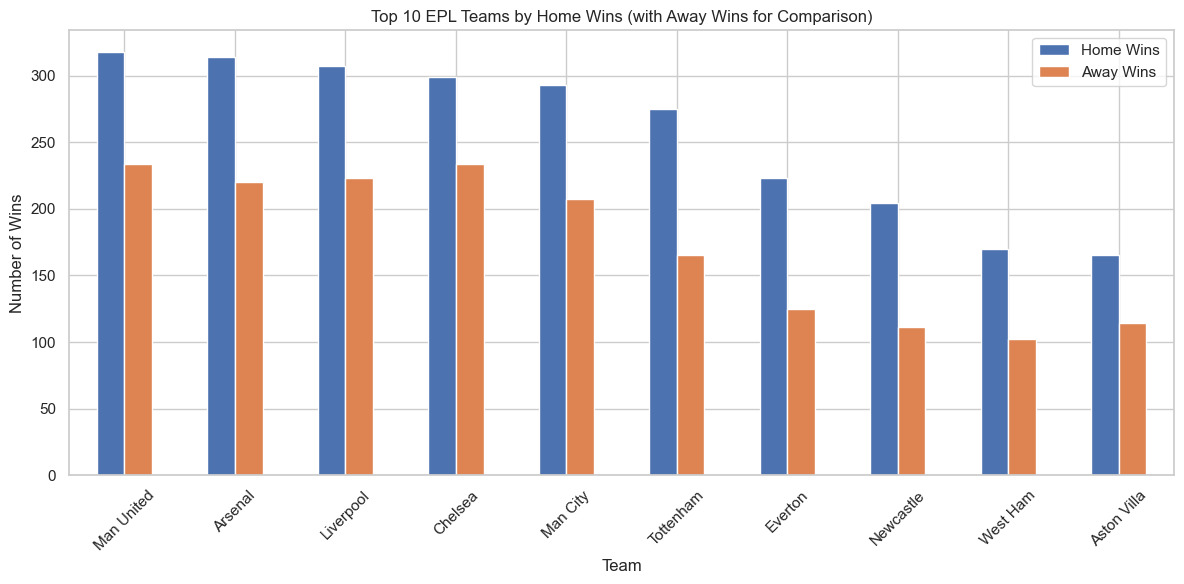

In [17]:
# Top 10 teams by Home Wins
top_10_by_home_wins = team_performance.sort_values("HomeWins", ascending=False).head(10)

# Plot Home vs. Away Wins for those teams
top_10_by_home_wins[["HomeWins", "AwayWins"]].plot(kind="bar", figsize=(12,6))
plt.title("Top 10 EPL Teams by Home Wins (with Away Wins for Comparison)")
plt.ylabel("Number of Wins")
plt.xlabel("Team")
plt.xticks(rotation=45)
plt.legend(["Home Wins", "Away Wins"])
plt.tight_layout()
plt.show()

In [8]:
# Average goals scored at home and away by each team
home_goals = df_copy.groupby("HomeTeam")["FullTimeHomeGoals"].mean().rename("AvgHomeGoals")
away_goals = df_copy.groupby("AwayTeam")["FullTimeAwayGoals"].mean().rename("AvgAwayGoals")

# Combine
avg_goals = pd.concat([home_goals, away_goals], axis=1).fillna(0)

# Sort by AvgHomeGoals
avg_goals_sorted = avg_goals.sort_values("AvgHomeGoals", ascending=False)
avg_goals_sorted.head(10)

,AvgHomeGoals,AvgAwayGoals
Man City,2.186667,1.633333
Arsenal,2.147436,1.648188
Liverpool,2.081370,1.645435
Chelsea,2.057569,1.572650
Man United,2.040512,1.592751
Tottenham,1.835821,1.407249
Brentford,1.653333,1.351351
Blackpool,1.578947,1.315789
Newcastle,1.565116,1.111369
Everton,1.511677,1.049251


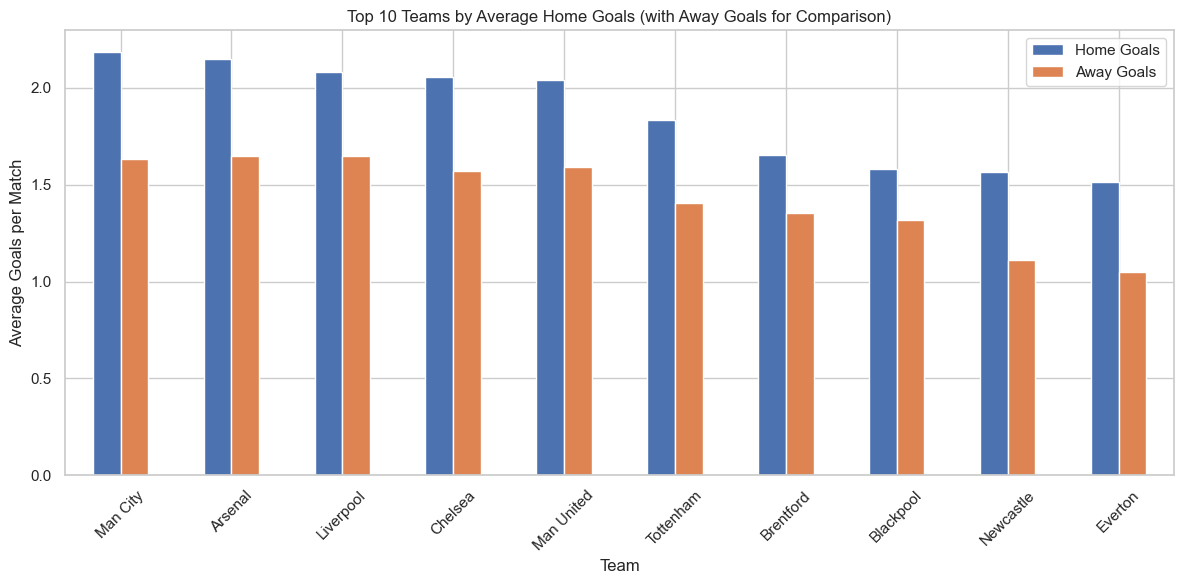

In [14]:
# Top 10 teams by average home goals
top_10_avg_goals = avg_goals.sort_values("AvgHomeGoals", ascending=False).head(10)

# Plot
top_10_avg_goals.plot(kind="bar", figsize=(12,6))
plt.title("Top 10 Teams by Average Home Goals (with Away Goals for Comparison)")
plt.ylabel("Average Goals per Match")
plt.xlabel("Team")
plt.xticks(rotation=45)
plt.legend(["Home Goals", "Away Goals"])
plt.tight_layout()
plt.show()

### ✅ Key Findings

- The most dominant teams at home — **Manchester United, Arsenal, Liverpool, Chelsea, and Manchester City** — top both **home wins** and **average home goals**.
- Across the entire league, **teams win and score significantly more at home** than away.
- This insight supports the common belief in "home field advantage" and is useful for **match prediction models**, **betting strategies**, and **performance analysis**.

## Question 2: Are Goal Totals Changing Across Seasons?

This analysis explores the **trend of goals scored over different seasons** to determine whether matches have become more offensive or defensive over time.

We'll look at:
- Average goals per match per season
- Total goals per season